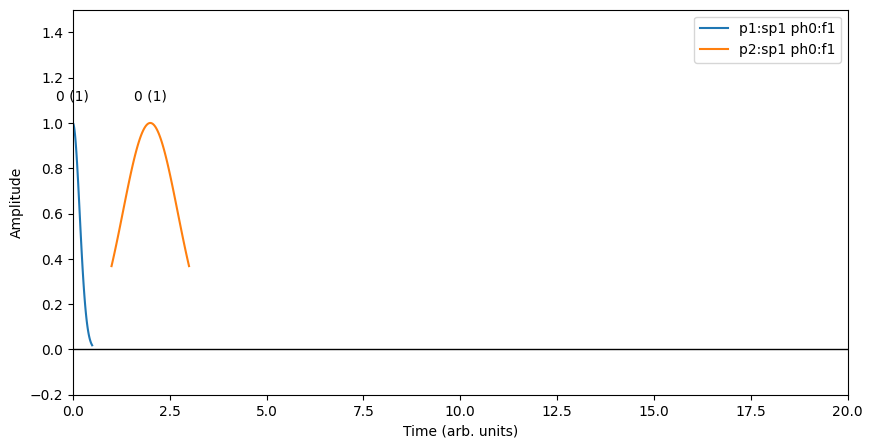

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import re

def plot_gaussian_pulse(ax, pos, duration, phase, channel, label):
    """Draw a Gaussian curve representing a pulse."""
    t = np.linspace(-1, 1, 100)
    pulse = np.exp(-t**2 * 4 / (duration ** 2))  # Gaussian curve
    
    # Plot the Gaussian pulse and assign a label
    line, = ax.plot(pos + t * duration / 2, pulse, label=label)
    
    # Display the phase and channel information above the pulse
    ax.text(pos, 1.1, f'{phase} ({channel})', ha='center', fontsize=10)
    
    # Return the new position for the next pulse
    return pos + duration

def plot_pulse_program(pulse_program):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_ylim(-0.2, 1.5)
    ax.set_xlim(0, 20)  # Extend the x-axis as needed
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("Time (arb. units)")

    current_pos = 0
    for line in pulse_program.splitlines():
        match = re.search(r'\(p(\d+):sp(\d+) ph(\d+)\):f(\d+)', line)
        if match:
            duration = int(match.group(1))  # Duration of pulse (e.g., p1, p2)
            shape = match.group(2)          # Shape (sp1, sp2)
            phase = match.group(3)          # Phase (ph0, ph1, ph2)
            channel = match.group(4)        # Channel (f1, f2)
            label = f'p{duration}:sp{shape} ph{phase}:f{channel}'

            # Draw the corresponding pulse (e.g., Gaussian)
            current_pos = plot_gaussian_pulse(ax, current_pos, duration, phase, channel, label)
            current_pos += 1.0  # Space between pulses

    ax.axhline(0, color='black', lw=1)
    
    # Only add the legend if there are any labels to display
    handles, labels = ax.get_legend_handles_labels()
    if labels:
        ax.legend(handles, labels)
    
    plt.show()

# Example Bruker pulse program input
bruker_pulse_program = """
(p1:sp1 ph0):f1
d4
(p2:sp1 ph0):f1
AQ
"""

plot_pulse_program(bruker_pulse_program)


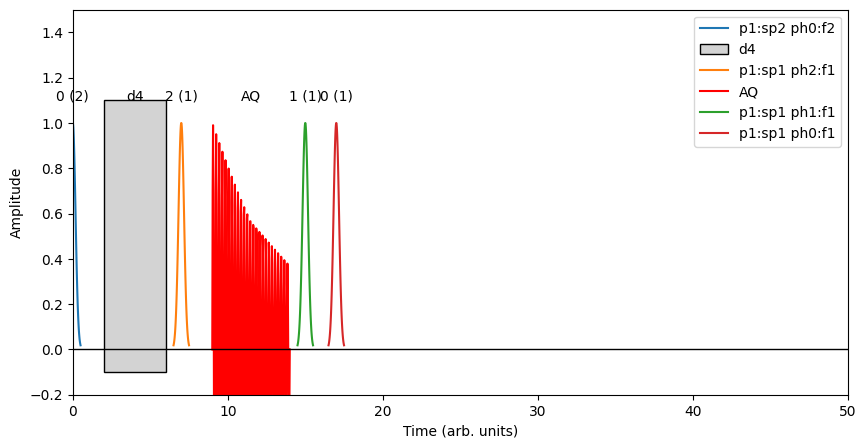

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import re

def plot_gaussian_pulse(ax, pos, duration, phase, channel, label):
    """Draw a Gaussian curve representing a pulse."""
    t = np.linspace(-1, 1, 100)
    pulse = np.exp(-t**2 * 4 / (duration ** 2))  # Gaussian curve
    
    # Plot the Gaussian pulse and assign a label
    line, = ax.plot(pos + t * duration / 2, pulse, label=label)
    
    # Display the phase and channel information above the pulse
    ax.text(pos, 1.1, f'{phase} ({channel})', ha='center', fontsize=10)
    
    # Return the new position for the next pulse
    return pos + duration

def plot_delay(ax, pos, duration, label):
    """Draw a box representing a delay."""
    rect = plt.Rectangle((pos, -0.1), duration, 1.2, facecolor='lightgray', edgecolor='black', label=label)
    ax.add_patch(rect)
    ax.text(pos + duration / 2, 1.1, label, ha='center', fontsize=10)
    return pos + duration

def plot_aq_signal(ax, pos, duration, label):
    """Draw a decaying sinusoidal signal representing acquisition."""
    t = np.linspace(0, duration, 200)
    signal = np.exp(-t / duration) * np.sin(2 * np.pi * 5 * t)  # Decaying sinusoid
    
    # Plot the decaying sinusoidal signal
    ax.plot(pos + t, signal, label=label, color='red')
    ax.text(pos + duration / 2, 1.1, label, ha='center', fontsize=10)
    
    return pos + duration

def plot_pulse_program(pulse_program):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_ylim(-0.2, 1.5)
    ax.set_xlim(0, 50)  # Extend the x-axis as needed
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("Time (arb. units)")

    current_pos = 0
    for line in pulse_program.splitlines():
        # Match pulse instructions
        match = re.search(r'\(p(\d+):sp(\d+) ph(\d+)\):f(\d+)', line)
        if match:
            duration = int(match.group(1))  # Duration of pulse (e.g., p1, p2)
            shape = match.group(2)          # Shape (sp1, sp2)
            phase = match.group(3)          # Phase (ph0, ph1, ph2)
            channel = match.group(4)        # Channel (f1, f2)
            label = f'p{duration}:sp{shape} ph{phase}:f{channel}'

            # Draw the corresponding Gaussian pulse
            current_pos = plot_gaussian_pulse(ax, current_pos, duration, phase, channel, label)
            current_pos += 1.0  # Space between pulses
        
        # Match delay instructions
        elif re.search(r'd(\d+)', line):
            duration = int(re.search(r'd(\d+)', line).group(1))
            label = f'd{duration}'
            current_pos = plot_delay(ax, current_pos, duration, label)
            current_pos += 1.0  # Space between pulses
        
        # Match acquisition instruction
        elif re.search(r'AQ', line):
            duration = 5  # You can adjust the duration of the acquisition as needed
            label = 'AQ'
            current_pos = plot_aq_signal(ax, current_pos, duration, label)
            current_pos += 1.0  # Space between signals

    ax.axhline(0, color='black', lw=1)
    
    # Add legend if labels exist
    handles, labels = ax.get_legend_handles_labels()
    if labels:
        ax.legend(handles, labels)
    
    plt.show()

# Example Bruker pulse program input
bruker_pulse_program = """
(p1:sp2 ph0):f2
d4
(p1:sp1 ph2):f1
AQ
(p1:sp1 ph1):f1
(p1:sp1 ph0):f1
"""

plot_pulse_program(bruker_pulse_program)


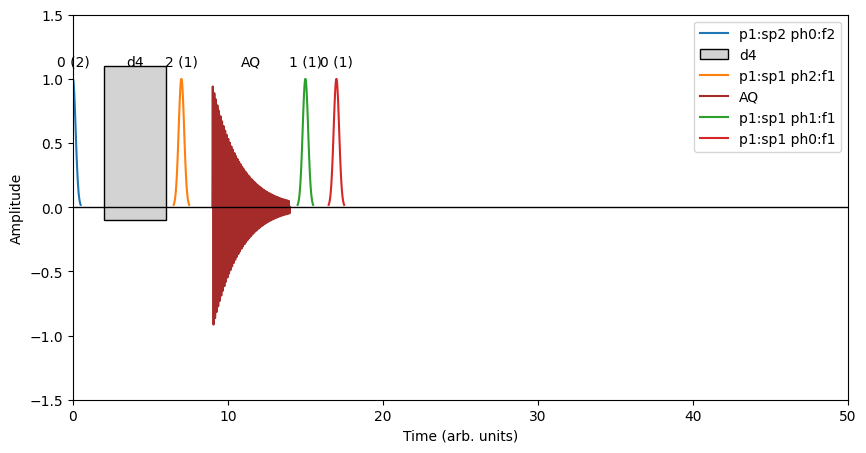

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import re

def plot_gaussian_pulse(ax, pos, duration, phase, channel, label):
    """Draw a Gaussian curve representing a pulse."""
    t = np.linspace(-1, 1, 100)
    pulse = np.exp(-t**2 * 4 / (duration ** 2))  # Gaussian curve
    
    # Plot the Gaussian pulse and assign a label
    line, = ax.plot(pos + t * duration / 2, pulse, label=label)
    
    # Display the phase and channel information above the pulse
    ax.text(pos, 1.1, f'{phase} ({channel})', ha='center', fontsize=10)
    
    # Return the new position for the next pulse
    return pos + duration

def plot_delay(ax, pos, duration, label):
    """Draw a box representing a delay."""
    rect = plt.Rectangle((pos, -0.1), duration, 1.2, facecolor='lightgray', edgecolor='black', label=label)
    ax.add_patch(rect)
    ax.text(pos + duration / 2, 1.1, label, ha='center', fontsize=10)
    return pos + duration

def plot_aq_signal(ax, pos, duration, label):
    """Draw a decaying sinusoidal signal representing acquisition."""
    t = np.linspace(0, duration, 500)
    
    # Create a sharp decaying sinusoidal signal
    signal = np.exp(-3 * t / duration) * np.sin(2 * np.pi * 10 * t)
    
    # Plot the decaying sinusoidal signal
    ax.plot(pos + t, signal, label=label, color='brown')
    ax.text(pos + duration / 2, 1.1, label, ha='center', fontsize=10)
    
    return pos + duration

def plot_pulse_program(pulse_program):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlim(0, 50)  # Extend the x-axis as needed
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("Time (arb. units)")

    current_pos = 0
    for line in pulse_program.splitlines():
        # Match pulse instructions
        match = re.search(r'\(p(\d+):sp(\d+) ph(\d+)\):f(\d+)', line)
        if match:
            duration = int(match.group(1))  # Duration of pulse (e.g., p1, p2)
            shape = match.group(2)          # Shape (sp1, sp2)
            phase = match.group(3)          # Phase (ph0, ph1, ph2)
            channel = match.group(4)        # Channel (f1, f2)
            label = f'p{duration}:sp{shape} ph{phase}:f{channel}'

            # Draw the corresponding Gaussian pulse
            current_pos = plot_gaussian_pulse(ax, current_pos, duration, phase, channel, label)
            current_pos += 1.0  # Space between pulses
        
        # Match delay instructions
        elif re.search(r'd(\d+)', line):
            duration = int(re.search(r'd(\d+)', line).group(1))
            label = f'd{duration}'
            current_pos = plot_delay(ax, current_pos, duration, label)
            current_pos += 1.0  # Space between pulses
        
        # Match acquisition instruction
        elif re.search(r'AQ', line):
            duration = 5  # Adjust the duration of the acquisition as needed
            label = 'AQ'
            current_pos = plot_aq_signal(ax, current_pos, duration, label)
            current_pos += 1.0  # Space between signals

    ax.axhline(0, color='black', lw=1)
    
    # Add legend if labels exist
    handles, labels = ax.get_legend_handles_labels()
    if labels:
        ax.legend(handles, labels)
    
    plt.show()

# Example Bruker pulse program input
bruker_pulse_program = """
(p1:sp2 ph0):f2
d4
(p1:sp1 ph2):f1
AQ
(p1:sp1 ph1):f1
(p1:sp1 ph0):f1
"""

plot_pulse_program(bruker_pulse_program)


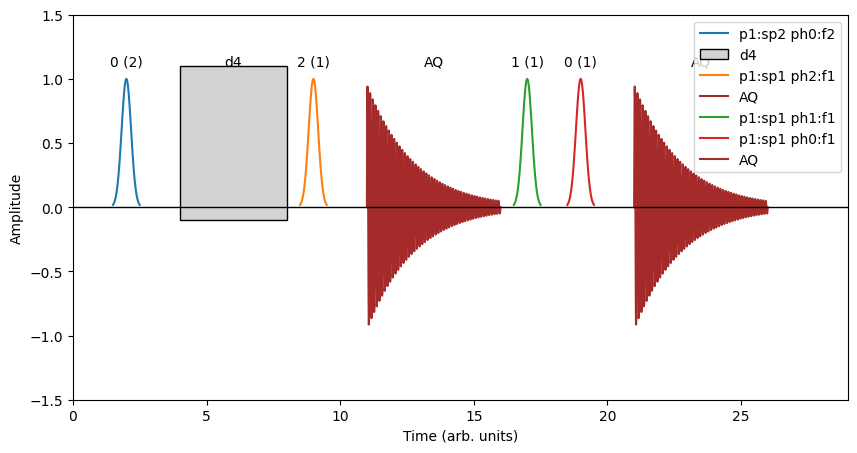

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import re

def plot_gaussian_pulse(ax, pos, duration, phase, channel, label):
    """Draw a Gaussian curve representing a pulse."""
    t = np.linspace(-1, 1, 100)
    pulse = np.exp(-t**2 * 4 / (duration ** 2))  # Gaussian curve
    
    # Plot the Gaussian pulse and assign a label
    line, = ax.plot(pos + t * duration / 2, pulse, label=label)
    
    # Display the phase and channel information above the pulse
    ax.text(pos, 1.1, f'{phase} ({channel})', ha='center', fontsize=10)
    
    # Return the new position for the next pulse
    return pos + duration

def plot_delay(ax, pos, duration, label):
    """Draw a box representing a delay."""
    rect = plt.Rectangle((pos, -0.1), duration, 1.2, facecolor='lightgray', edgecolor='black', label=label)
    ax.add_patch(rect)
    ax.text(pos + duration / 2, 1.1, label, ha='center', fontsize=10)
    return pos + duration

def plot_aq_signal(ax, pos, duration, label):
    """Draw a decaying sinusoidal signal representing acquisition."""
    t = np.linspace(0, duration, 500)
    
    # Create a sharp decaying sinusoidal signal
    signal = np.exp(-3 * t / duration) * np.sin(2 * np.pi * 10 * t)
    
    # Plot the decaying sinusoidal signal
    ax.plot(pos + t, signal, label=label, color='brown')
    ax.text(pos + duration / 2, 1.1, label, ha='center', fontsize=10)
    
    return pos + duration

def plot_pulse_program(pulse_program):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_ylim(-1.5, 1.5)
    
    buffer_start = 2  # Padding to prevent cutting off the first pulse
    current_pos = buffer_start  # Start after the buffer
    
    for line in pulse_program.splitlines():
        # Match pulse instructions
        match = re.search(r'\(p(\d+):sp(\d+) ph(\d+)\):f(\d+)', line)
        if match:
            duration = int(match.group(1))  # Duration of pulse (e.g., p1, p2)
            shape = match.group(2)          # Shape (sp1, sp2)
            phase = match.group(3)          # Phase (ph0, ph1, ph2)
            channel = match.group(4)        # Channel (f1, f2)
            label = f'p{duration}:sp{shape} ph{phase}:f{channel}'

            # Draw the corresponding Gaussian pulse
            current_pos = plot_gaussian_pulse(ax, current_pos, duration, phase, channel, label)
            current_pos += 1.0  # Space between pulses
        
        # Match delay instructions
        elif re.search(r'd(\d+)', line):
            duration = int(re.search(r'd(\d+)', line).group(1))
            label = f'd{duration}'
            current_pos = plot_delay(ax, current_pos, duration, label)
            current_pos += 1.0  # Space between pulses
        
        # Match acquisition instruction
        elif re.search(r'AQ', line):
            duration = 5  # Adjust the duration of the acquisition as needed
            label = 'AQ'
            current_pos = plot_aq_signal(ax, current_pos, duration, label)
            current_pos += 1.0  # Space between signals

    # Adjust the x-axis dynamically based on the length of the pulse sequence
    ax.set_xlim(0, current_pos + buffer_start)
    
    ax.axhline(0, color='black', lw=1)
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("Time (arb. units)")

    # Add legend if labels exist
    handles, labels = ax.get_legend_handles_labels()
    if labels:
        ax.legend(handles, labels)
    
    plt.show()

# Example Bruker pulse program input
bruker_pulse_program = """
(p1:sp2 ph0):f2
d4
(p1:sp1 ph2):f1
AQ
(p1:sp1 ph1):f1
(p1:sp1 ph0):f1
AQ
"""

plot_pulse_program(bruker_pulse_program)


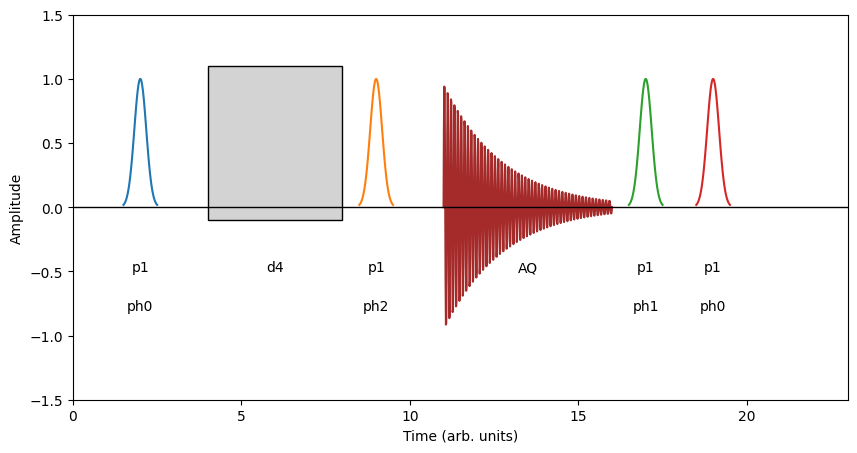

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import re

def plot_gaussian_pulse(ax, pos, duration, phase, channel, label):
    """Draw a Gaussian curve representing a pulse."""
    t = np.linspace(-1, 1, 100)
    pulse = np.exp(-t**2 * 4 / (duration ** 2))  # Gaussian curve
    
    # Plot the Gaussian pulse
    ax.plot(pos + t * duration / 2, pulse)
    
    # Display the phase and duration information below the pulse
    ax.text(pos, -0.5, f'p{duration}', ha='center', fontsize=10)
    ax.text(pos, -0.8, f'ph{phase}', ha='center', fontsize=10)
    
    # Return the new position for the next pulse
    return pos + duration

def plot_delay(ax, pos, duration, label):
    """Draw a box representing a delay."""
    rect = plt.Rectangle((pos, -0.1), duration, 1.2, facecolor='lightgray', edgecolor='black', label=label)
    ax.add_patch(rect)
    ax.text(pos + duration / 2, -0.5, label, ha='center', fontsize=10)
    return pos + duration

def plot_aq_signal(ax, pos, duration, label):
    """Draw a decaying sinusoidal signal representing acquisition."""
    t = np.linspace(0, duration, 500)
    
    # Create a sharp decaying sinusoidal signal
    signal = np.exp(-3 * t / duration) * np.sin(2 * np.pi * 10 * t)
    
    # Plot the decaying sinusoidal signal
    ax.plot(pos + t, signal, color='brown')
    ax.text(pos + duration / 2, -0.5, label, ha='center', fontsize=10)
    
    return pos + duration

def plot_pulse_program(pulse_program):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_ylim(-1.5, 1.5)
    
    buffer_start = 2  # Padding to prevent cutting off the first pulse
    current_pos = buffer_start  # Start after the buffer
    
    for line in pulse_program.splitlines():
        # Match pulse instructions
        match = re.search(r'\(p(\d+):sp(\d+) ph(\d+)\):f(\d+)', line)
        if match:
            duration = int(match.group(1))  # Duration of pulse (e.g., p1, p2)
            shape = match.group(2)          # Shape (sp1, sp2)
            phase = match.group(3)          # Phase (ph0, ph1, ph2)
            channel = match.group(4)        # Channel (f1, f2)
            label = f'p{duration}:sp{shape} ph{phase}:f{channel}'

            # Draw the corresponding Gaussian pulse
            current_pos = plot_gaussian_pulse(ax, current_pos, duration, phase, channel, label)
            current_pos += 1.0  # Space between pulses
        
        # Match delay instructions
        elif re.search(r'd(\d+)', line):
            duration = int(re.search(r'd(\d+)', line).group(1))
            label = f'd{duration}'
            current_pos = plot_delay(ax, current_pos, duration, label)
            current_pos += 1.0  # Space between pulses
        
        # Match acquisition instruction
        elif re.search(r'AQ', line):
            duration = 5  # Adjust the duration of the acquisition as needed
            label = 'AQ'
            current_pos = plot_aq_signal(ax, current_pos, duration, label)
            current_pos += 1.0  # Space between signals

    # Adjust the x-axis dynamically based on the length of the pulse sequence
    ax.set_xlim(0, current_pos + buffer_start)
    
    ax.axhline(0, color='black', lw=1)
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("Time (arb. units)")

    # Show the plot without the text on top, and with labels below the pulses
    plt.show()

# Example Bruker pulse program input
bruker_pulse_program = """
(p1:sp2 ph0):f2
d4
(p1:sp1 ph2):f1
AQ
(p1:sp1 ph1):f1
(p1:sp1 ph0):f1
"""

plot_pulse_program(bruker_pulse_program)


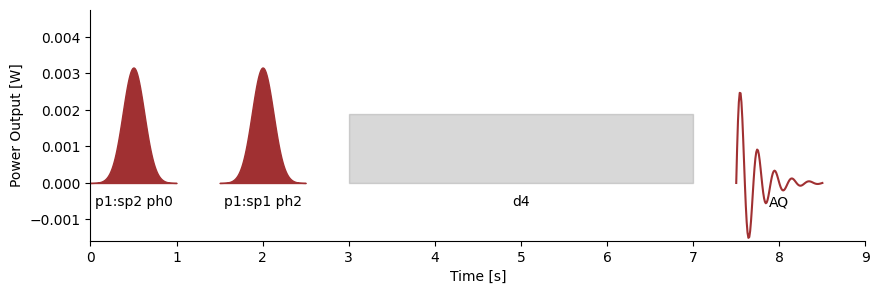

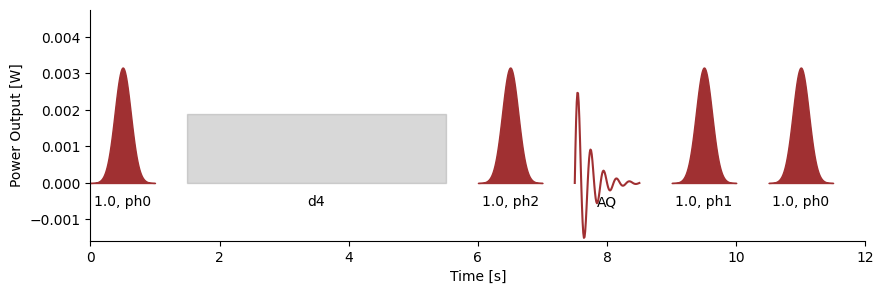

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate a gaussian pulse
def gaussian_pulse(t, pulse_length, height):
    return height * np.exp(-((t - pulse_length / 2) ** 2) / (2 * (pulse_length / 8) ** 2))

# Function to generate decaying sinusoidal (for AQ)
def decaying_sinusoidal(t, freq, decay_rate):
    return np.sin(2 * np.pi * freq * t) * np.exp(-decay_rate * t)

# Initialize figure
fig, ax = plt.subplots(figsize=(10, 3))

# Example pulse program input
pulse_program = [
    "(p1:sp2 ph0):f2",
    "d4",
    "(p1:sp1 ph2):f1",
    "AQ",
    "(p1:sp1 ph1):f1",
    "(p1:sp1 ph0):f1"
]
 
  
# Parameters
pulse_height = 0.0031623  # Fixed height for all pulses
color = '#A03032'
spacing = 0.5  # Space between pulses
t_total = 0  # To track total time on the axis

# Process pulse program
for pulse in pulse_program:
    if 'p' in pulse:
        # Extract pulse length
        pulse_length = float(pulse.split(':')[0][2:])  # Assuming (p1:sp2 ph0):f2 format
        phase_info = pulse.split(' ')[1].split(')')[0]  # Extract phase information (e.g., ph0)
        t = np.linspace(0, pulse_length, 100)
        y = gaussian_pulse(t, pulse_length, pulse_height)
        ax.fill_between(t + t_total, 0, y, color=color)
        
        # Labeling the pulse below it
        ax.text(t_total + pulse_length / 2, -pulse_height * 0.2, f"{pulse_length}, {phase_info}", ha='center')
        
        t_total += pulse_length + spacing
    
    elif 'd' in pulse:
        # Handle delay block
        delay_length = float(pulse[1:])  # Assuming d4, d5, etc.
        ax.fill_between([t_total, t_total + delay_length], 0, pulse_height * 0.6, color='gray', alpha=0.3)
        
        # Label delay
        ax.text(t_total + delay_length / 2, -pulse_height * 0.2, pulse, ha='center')
        
        t_total += delay_length + spacing
    
    elif pulse == 'AQ':
        # Handle acquisition block (decaying sinusoidal)
        t = np.linspace(0, 1, 100)
        y = decaying_sinusoidal(t, freq=5, decay_rate=5)
        ax.plot(t + t_total, y * pulse_height, color=color)
        
        # Label acquisition
        ax.text(t_total + 0.5, -pulse_height * 0.2, 'AQ', ha='center')
        
        t_total += 1 + spacing

# Customize the plot
ax.set_ylim([-pulse_height * 0.5, pulse_height * 1.5])
ax.set_xlim([0, t_total])
ax.set_ylabel('Power Output [W]')
ax.set_xlabel('Time [s]')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()



In [ ]:
(p3:sp1 ph4):f1
(p2:sp2 ph1):f2
d7
(p2:sp2 ph0):f2
(p2:sp2 ph2):f2
(p2:sp2 ph3):f2 
(p2:sp2 ph0):f2 
(p1:sp1 ph2):f1 
(p1:sp1 ph1):f1 
(p1:sp1 ph0):f1  
(p1:sp1 ph0):f1

ValueError: too many values to unpack (expected 2)

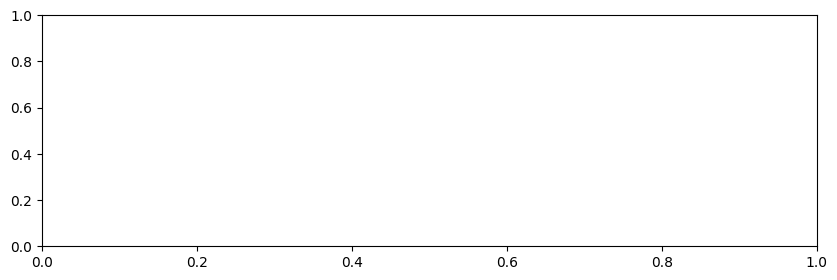

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate a gaussian pulse
def gaussian_pulse(t, pulse_length, height):
    return height * np.exp(-((t - pulse_length / 2) ** 2) / (2 * (pulse_length / 8) ** 2))

# Function to generate decaying sinusoidal (for AQ)
def decaying_sinusoidal(t, freq, decay_rate):
    return np.sin(2 * np.pi * freq * t) * np.exp(-decay_rate * t)

# Initialize figure
fig, ax = plt.subplots(figsize=(10, 3))

# Example pulse program input
pulse_program_input = """
(p3:sp1 ph4):f1
(p2:sp2 ph1):f2
d7
(p2:sp2 ph0):f2
(p2:sp2 ph2):f2
(p2:sp2 ph3):f2
(p2:sp2 ph0):f2
(p1:sp1 ph2):f1
(p1:sp1 ph1):f1
(p1:sp1 ph0):f1
(p1:sp1 ph0):f1
"""

# Parameters
pulse_height = 0.0031623  # Fixed height for all pulses
color = '#A03032'
spacing = 0.5  # Space between pulses
t_total = 0  # To track total time on the axis

# Split input into lines and process each line
pulse_program_lines = pulse_program_input.strip().splitlines()

# Function to parse the pulse program line
def parse_pulse_program_line(line):
    if 'p' in line:
        pulse_block, channel = line.split(':')
        pulse = pulse_block.strip('()')
        return pulse, channel
    else:
        return line, 'delay'

# Process pulse program
for line in pulse_program_lines:
    pulse, ch = parse_pulse_program_line(line)
    
    if 'p' in pulse:
        # Extract pulse length from the pulse, like p1, p2, etc.
        pulse_length = float(pulse.split(':')[0][1:])  # Assuming p1, p2, etc.
        t = np.linspace(0, pulse_length, 100)
        y = gaussian_pulse(t, pulse_length, pulse_height)
        ax.fill_between(t + t_total, 0, y, color=color)
        
        # Labeling the pulse below it
        ax.text(t_total + pulse_length / 2, -pulse_height * 0.2, pulse, ha='center')
        
        t_total += pulse_length + spacing
    
    elif 'd' in pulse:
        # Handle delay block
        delay_length = float(pulse[1:])  # Assuming d7, d4, etc.
        ax.fill_between([t_total, t_total + delay_length], 0, pulse_height * 0.6, color='gray', alpha=0.3)
        
        # Label delay
        ax.text(t_total + delay_length / 2, -pulse_height * 0.2, pulse, ha='center')
        
        t_total += delay_length + spacing

    elif pulse == 'AQ':
        # Handle acquisition block (decaying sinusoidal)
        t = np.linspace(0, 1, 100)
        y = decaying_sinusoidal(t, freq=5, decay_rate=5)
        ax.plot(t + t_total, y * pulse_height, color=color)
        
        # Label acquisition
        ax.text(t_total + 0.5, -pulse_height * 0.2, 'AQ', ha='center')
        
        t_total += 1 + spacing

# Customize the plot
ax.set_ylim([-pulse_height * 0.5, pulse_height * 1.5])
ax.set_xlim([0, t_total])
ax.set_ylabel('Power Output [W]')
ax.set_xlabel('Time [s]')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


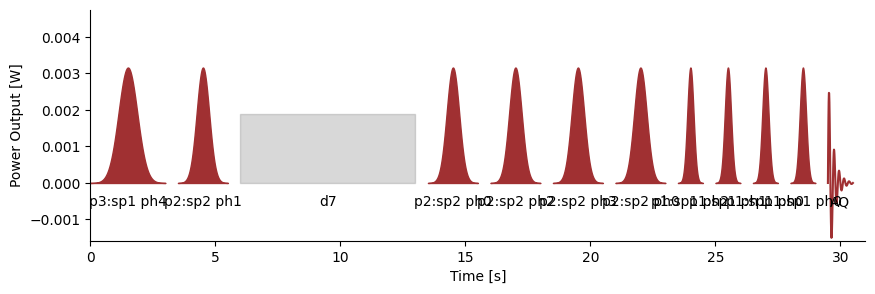

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate a gaussian pulse
def gaussian_pulse(t, pulse_length, height):
    return height * np.exp(-((t - pulse_length / 2) ** 2) / (2 * (pulse_length / 8) ** 2))

# Function to generate decaying sinusoidal (for AQ)
def decaying_sinusoidal(t, freq, decay_rate):
    return np.sin(2 * np.pi * freq * t) * np.exp(-decay_rate * t)

# Initialize figure
fig, ax = plt.subplots(figsize=(10, 3))

# Example pulse program input
pulse_program_input = """
(p3:sp1 ph4):f1
(p2:sp2 ph1):f2
d7
(p2:sp2 ph0):f2
(p2:sp2 ph2):f2
(p2:sp2 ph3):f2
(p2:sp2 ph0):f2
(p1:sp1 ph2):f1
(p1:sp1 ph1):f1
(p1:sp1 ph0):f1
(p1:sp1 ph0):f1
AQ
"""

# Parameters
pulse_height = 0.0031623  # Fixed height for all pulses
color = '#A03032'
spacing = 0.5  # Space between pulses
t_total = 0  # To track total time on the axis

# Split input into lines and process each line
pulse_program_lines = pulse_program_input.strip().splitlines()

# Function to parse the pulse program line
def parse_pulse_program_line(line):
    if 'p' in line and '(' in line:
        # Extract the pulse inside the parentheses
        pulse_block = line.split(')')[0].strip('()')  # Everything inside parentheses
        channel = line.split(':')[-1]  # Channel designation after last colon
        return pulse_block, channel
    else:
        return line.strip(), 'delay'

# Process pulse program
for line in pulse_program_lines:
    pulse, ch = parse_pulse_program_line(line)
    
    if 'p' in pulse:
        # Extract pulse length from the pulse, like p1, p2, etc.
        pulse_length = float(pulse.split(':')[0][1:])  # Assuming p1, p2, etc.
        t = np.linspace(0, pulse_length, 100)
        y = gaussian_pulse(t, pulse_length, pulse_height)
        ax.fill_between(t + t_total, 0, y, color=color)
        
        # Labeling the pulse below it
        ax.text(t_total + pulse_length / 2, -pulse_height * 0.2, pulse, ha='center')
        
        t_total += pulse_length + spacing
    
    elif 'd' in pulse:
        # Handle delay block
        delay_length = float(pulse[1:])  # Assuming d7, d4, etc.
        ax.fill_between([t_total, t_total + delay_length], 0, pulse_height * 0.6, color='gray', alpha=0.3)
        
        # Label delay
        ax.text(t_total + delay_length / 2, -pulse_height * 0.2, pulse, ha='center')
        
        t_total += delay_length + spacing

    elif pulse == 'AQ':
        # Handle acquisition block (decaying sinusoidal)
        t = np.linspace(0, 1, 100)
        y = decaying_sinusoidal(t, freq=5, decay_rate=5)
        ax.plot(t + t_total, y * pulse_height, color=color)
        
        # Label acquisition
        ax.text(t_total + 0.5, -pulse_height * 0.2, 'AQ', ha='center')
        
        t_total += 1 + spacing

# Customize the plot
ax.set_ylim([-pulse_height * 0.5, pulse_height * 1.5])
ax.set_xlim([0, t_total])
ax.set_ylabel('Power Output [W]')
ax.set_xlabel('Time [s]')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


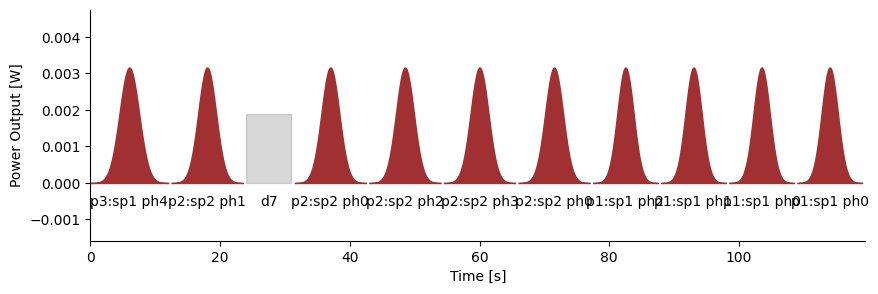

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate a gaussian pulse
def gaussian_pulse(t, pulse_length, height):
    return height * np.exp(-((t - pulse_length / 2) ** 2) / (2 * (pulse_length / 8) ** 2))

# Function to generate decaying sinusoidal (for AQ)
def decaying_sinusoidal(t, freq, decay_rate):
    return np.sin(2 * np.pi * freq * t) * np.exp(-decay_rate * t)

# Initialize figure
fig, ax = plt.subplots(figsize=(10, 3))

# Example pulse program input
pulse_program_input = """
(p3:sp1 ph4):f1
(p2:sp2 ph1):f2
d7
(p2:sp2 ph0):f2
(p2:sp2 ph2):f2
(p2:sp2 ph3):f2
(p2:sp2 ph0):f2
(p1:sp1 ph2):f1
(p1:sp1 ph1):f1
(p1:sp1 ph0):f1
(p1:sp1 ph0):f1
"""

# Dictionary to map pulse labels to custom durations
pulse_durations = {
    'p1': 10,  # p1 is 5 seconds
    'p2': 11,  # p2 is 7 seconds
    'p3': 12   # p3 is 6 seconds
}

# Parameters
pulse_height = 0.0031623  # Fixed height for all pulses
color = '#A03032'
spacing = 0.5  # Space between pulses
t_total = 0  # To track total time on the axis

# Split input into lines and process each line
pulse_program_lines = pulse_program_input.strip().splitlines()

# Function to parse the pulse program line
def parse_pulse_program_line(line):
    if 'p' in line and '(' in line:
        # Extract the pulse inside the parentheses
        pulse_block = line.split(')')[0].strip('()')  # Everything inside parentheses
        channel = line.split(':')[-1]  # Channel designation after last colon
        return pulse_block, channel
    else:
        return line.strip(), 'delay'

# Process pulse program
for line in pulse_program_lines:
    pulse, ch = parse_pulse_program_line(line)
    
    if 'p' in pulse:
        # Extract the pulse identifier (e.g., p1, p2, p3)
        pulse_id = pulse.split(':')[0]
        
        # Use the custom pulse duration from the dictionary
        pulse_length = pulse_durations.get(pulse_id, 1)  # Default to 1 second if not found
        
        t = np.linspace(0, pulse_length, 100)
        y = gaussian_pulse(t, pulse_length, pulse_height)
        ax.fill_between(t + t_total, 0, y, color=color)
        
        # Labeling the pulse below it
        ax.text(t_total + pulse_length / 2, -pulse_height * 0.2, pulse, ha='center')
        
        t_total += pulse_length + spacing
    
    elif 'd' in pulse:
        # Handle delay block
        delay_length = float(pulse[1:])  # Assuming d7, d4, etc.
        ax.fill_between([t_total, t_total + delay_length], 0, pulse_height * 0.6, color='gray', alpha=0.3)
        
        # Label delay
        ax.text(t_total + delay_length / 2, -pulse_height * 0.2, pulse, ha='center')
        
        t_total += delay_length + spacing

    elif pulse == 'AQ':
        # Handle acquisition block (decaying sinusoidal)
        t = np.linspace(0, 1, 100)
        y = decaying_sinusoidal(t, freq=5, decay_rate=5)
        ax.plot(t + t_total, y * pulse_height, color=color)
        
        # Label acquisition
        ax.text(t_total + 0.5, -pulse_height * 0.2, 'AQ', ha='center')
        
        t_total += 1 + spacing

# Customize the plot
ax.set_ylim([-pulse_height * 0.5, pulse_height * 1.5])
ax.set_xlim([0, t_total])
ax.set_ylabel('Power Output [W]')
ax.set_xlabel('Time [s]')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


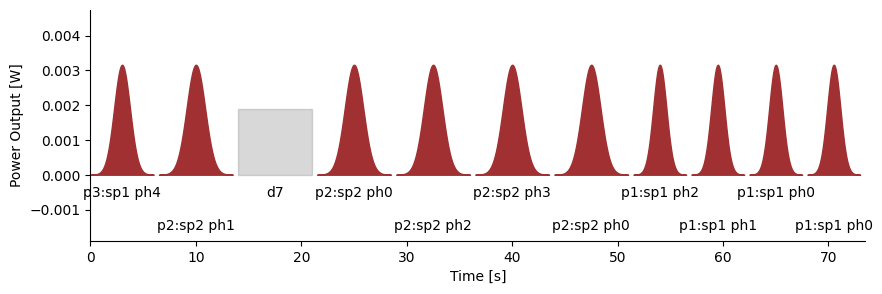

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate a gaussian pulse
def gaussian_pulse(t, pulse_length, height):
    return height * np.exp(-((t - pulse_length / 2) ** 2) / (2 * (pulse_length / 8) ** 2))

# Function to generate decaying sinusoidal (for AQ)
def decaying_sinusoidal(t, freq, decay_rate):
    return np.sin(2 * np.pi * freq * t) * np.exp(-decay_rate * t)

# Initialize figure
fig, ax = plt.subplots(figsize=(10, 3))

# Example pulse program input
pulse_program_input = """
(p3:sp1 ph4):f1
(p2:sp2 ph1):f2
d7
(p2:sp2 ph0):f2
(p2:sp2 ph2):f2
(p2:sp2 ph3):f2
(p2:sp2 ph0):f2
(p1:sp1 ph2):f1
(p1:sp1 ph1):f1
(p1:sp1 ph0):f1
(p1:sp1 ph0):f1
"""

# Dictionary to map pulse labels to custom durations
pulse_durations = {
    'p1': 5,  # p1 is 5 seconds
    'p2': 7,  # p2 is 7 seconds
    'p3': 6   # p3 is 6 seconds
}

# Parameters
pulse_height = 0.0031623  # Fixed height for all pulses
color = '#A03032'
spacing = 0.5  # Space between pulses
t_total = 0  # To track total time on the axis

# Alternate label height
label_offset_toggle = True  # Toggle between label heights

# Split input into lines and process each line
pulse_program_lines = pulse_program_input.strip().splitlines()

# Function to parse the pulse program line
def parse_pulse_program_line(line):
    if 'p' in line and '(' in line:
        # Extract the pulse inside the parentheses
        pulse_block = line.split(')')[0].strip('()')  # Everything inside parentheses
        channel = line.split(':')[-1]  # Channel designation after last colon
        return pulse_block, channel
    else:
        return line.strip(), 'delay'

# Process pulse program
for line in pulse_program_lines:
    pulse, ch = parse_pulse_program_line(line)
    
    if 'p' in pulse:
        # Extract the pulse identifier (e.g., p1, p2, p3)
        pulse_id = pulse.split(':')[0]
        
        # Use the custom pulse duration from the dictionary
        pulse_length = pulse_durations.get(pulse_id, 1)  # Default to 1 second if not found
        
        t = np.linspace(0, pulse_length, 100)
        y = gaussian_pulse(t, pulse_length, pulse_height)
        ax.fill_between(t + t_total, 0, y, color=color)
        
        # Toggle label position to avoid overlap
        label_offset = -pulse_height * 0.2 if label_offset_toggle else -pulse_height * 0.5
        label_offset_toggle = not label_offset_toggle  # Switch toggle for next label
        
        # Labeling the pulse below it
        ax.text(t_total + pulse_length / 2, label_offset, pulse, ha='center')
        
        t_total += pulse_length + spacing
    
    elif 'd' in pulse:
        # Handle delay block
        delay_length = float(pulse[1:])  # Assuming d7, d4, etc.
        ax.fill_between([t_total, t_total + delay_length], 0, pulse_height * 0.6, color='gray', alpha=0.3)
        
        # Label delay
        ax.text(t_total + delay_length / 2, -pulse_height * 0.2, pulse, ha='center')
        
        t_total += delay_length + spacing

    elif pulse == 'AQ':
        # Handle acquisition block (decaying sinusoidal)
        t = np.linspace(0, 1, 100)
        y = decaying_sinusoidal(t, freq=5, decay_rate=5)
        ax.plot(t + t_total, y * pulse_height, color=color)
        
        # Label acquisition
        ax.text(t_total + 0.5, -pulse_height * 0.2, 'AQ', ha='center')
        
        t_total += 1 + spacing

# Customize the plot
ax.set_ylim([-pulse_height * 0.6, pulse_height * 1.5])  # Adjust y-limits for label placement
ax.set_xlim([0, t_total])
ax.set_ylabel('Power Output [W]')
ax.set_xlabel('Time [s]')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


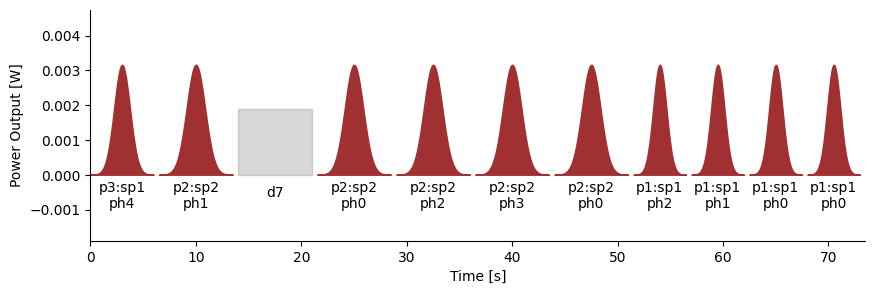

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate a gaussian pulse
def gaussian_pulse(t, pulse_length, height):
    return height * np.exp(-((t - pulse_length / 2) ** 2) / (2 * (pulse_length / 8) ** 2))

# Function to generate decaying sinusoidal (for AQ)
def decaying_sinusoidal(t, freq, decay_rate):
    return np.sin(2 * np.pi * freq * t) * np.exp(-decay_rate * t)

# Initialize figure
fig, ax = plt.subplots(figsize=(10, 3))

# Example pulse program input
pulse_program_input = """
(p3:sp1 ph4):f1
(p2:sp2 ph1):f2
d7
(p2:sp2 ph0):f2
(p2:sp2 ph2):f2
(p2:sp2 ph3):f2
(p2:sp2 ph0):f2
(p1:sp1 ph2):f1
(p1:sp1 ph1):f1
(p1:sp1 ph0):f1
(p1:sp1 ph0):f1
"""

# Dictionary to map pulse labels to custom durations
pulse_durations = {
    'p1': 5,  # p1 is 5 seconds
    'p2': 7,  # p2 is 7 seconds
    'p3': 6   # p3 is 6 seconds
}

# Parameters
pulse_height = 0.0031623  # Fixed height for all pulses
color = '#A03032'
spacing = 0.5  # Space between pulses
t_total = 0  # To track total time on the axis

# Split input into lines and process each line
pulse_program_lines = pulse_program_input.strip().splitlines()

# Function to parse the pulse program line
def parse_pulse_program_line(line):
    if 'p' in line and '(' in line:
        # Extract the pulse inside the parentheses
        pulse_block = line.split(')')[0].strip('()')  # Everything inside parentheses
        channel = line.split(':')[-1]  # Channel designation after last colon
        return pulse_block, channel
    else:
        return line.strip(), 'delay'

# Function to create a stacked label
def create_stacked_label(pulse):
    parts = pulse.split(' ')
    return '\n'.join(parts)  # Stacking by joining with newline '\n'

# Process pulse program
for line in pulse_program_lines:
    pulse, ch = parse_pulse_program_line(line)
    
    if 'p' in pulse:
        # Extract the pulse identifier (e.g., p1, p2, p3)
        pulse_id = pulse.split(':')[0]
        
        # Use the custom pulse duration from the dictionary
        pulse_length = pulse_durations.get(pulse_id, 1)  # Default to 1 second if not found
        
        t = np.linspace(0, pulse_length, 100)
        y = gaussian_pulse(t, pulse_length, pulse_height)
        ax.fill_between(t + t_total, 0, y, color=color)
        
        # Create and add the stacked label (vertically stacked)
        stacked_label = create_stacked_label(pulse)
        ax.text(t_total + pulse_length / 2, -pulse_height * 0.3, stacked_label, ha='center')
        
        t_total += pulse_length + spacing
    
    elif 'd' in pulse:
        # Handle delay block
        delay_length = float(pulse[1:])  # Assuming d7, d4, etc.
        ax.fill_between([t_total, t_total + delay_length], 0, pulse_height * 0.6, color='gray', alpha=0.3)
        
        # Label delay
        ax.text(t_total + delay_length / 2, -pulse_height * 0.2, pulse, ha='center')
        
        t_total += delay_length + spacing

    elif pulse == 'AQ':
        # Handle acquisition block (decaying sinusoidal)
        t = np.linspace(0, 1, 100)
        y = decaying_sinusoidal(t, freq=5, decay_rate=5)
        ax.plot(t + t_total, y * pulse_height, color=color)
        
        # Label acquisition
        ax.text(t_total + 0.5, -pulse_height * 0.2, 'AQ', ha='center')
        
        t_total += 1 + spacing

# Customize the plot
ax.set_ylim([-pulse_height * 0.6, pulse_height * 1.5])  # Adjust y-limits for label placement
ax.set_xlim([0, t_total])
ax.set_ylabel('Power Output [W]')
ax.set_xlabel('Time [s]')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


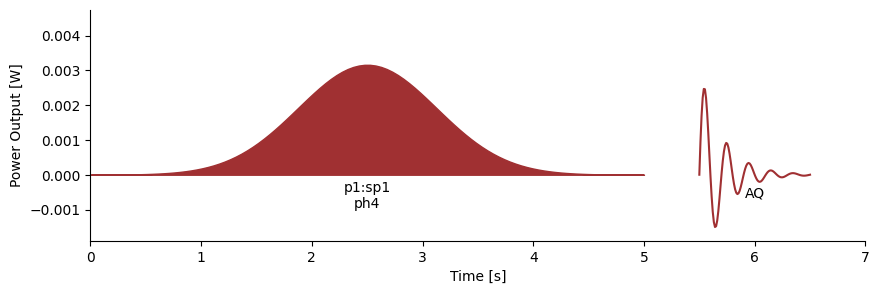

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate a gaussian pulse
def gaussian_pulse(t, pulse_length, height):
    return height * np.exp(-((t - pulse_length / 2) ** 2) / (2 * (pulse_length / 8) ** 2))

# Function to generate decaying sinusoidal (for AQ)
def decaying_sinusoidal(t, freq, decay_rate):
    return np.sin(2 * np.pi * freq * t) * np.exp(-decay_rate * t)

# Initialize figure
fig, ax = plt.subplots(figsize=(10, 3))

# Example pulse program input
pulse_program_input = """
(p1:sp1 ph4):f1
AQ
"""

# Dictionary to map pulse labels to custom durations
pulse_durations = {
    'p1': 5,  # p1 is 5 seconds
    'p2': 7,  # p2 is 7 seconds
    'p3': 6   # p3 is 6 seconds
}

# Parameters
pulse_height = 0.0031623  # Fixed height for all pulses
color = '#A03032'
spacing = 0.5  # Space between pulses
t_total = 0  # To track total time on the axis

# Split input into lines and process each line
pulse_program_lines = pulse_program_input.strip().splitlines()

# Function to parse the pulse program line
def parse_pulse_program_line(line):
    if 'p' in line and '(' in line:
        # Extract the pulse inside the parentheses
        pulse_block = line.split(')')[0].strip('()')  # Everything inside parentheses
        channel = line.split(':')[-1]  # Channel designation after last colon
        return pulse_block, channel
    else:
        return line.strip(), 'delay'

# Function to create a stacked label
def create_stacked_label(pulse):
    parts = pulse.split(' ')
    return '\n'.join(parts)  # Stacking by joining with newline '\n'

# Process pulse program
for line in pulse_program_lines:
    pulse, ch = parse_pulse_program_line(line)
    
    if 'p' in pulse:
        # Extract the pulse identifier (e.g., p1, p2, p3)
        pulse_id = pulse.split(':')[0]
        
        # Use the custom pulse duration from the dictionary
        pulse_length = pulse_durations.get(pulse_id, 1)  # Default to 1 second if not found
        
        t = np.linspace(0, pulse_length, 100)
        y = gaussian_pulse(t, pulse_length, pulse_height)
        ax.fill_between(t + t_total, 0, y, color=color)
        
        # Create and add the stacked label (vertically stacked)
        stacked_label = create_stacked_label(pulse)
        ax.text(t_total + pulse_length / 2, -pulse_height * 0.3, stacked_label, ha='center')
        
        t_total += pulse_length + spacing
    
    elif 'd' in pulse:
        # Handle delay block
        delay_length = float(pulse[1:])  # Assuming d7, d4, etc.
        ax.fill_between([t_total, t_total + delay_length], 0, pulse_height * 0.6, color='gray', alpha=0.3)
        
        # Label delay
        ax.text(t_total + delay_length / 2, -pulse_height * 0.2, pulse, ha='center')
        
        t_total += delay_length + spacing

    elif pulse == 'AQ':
        # Handle acquisition block (decaying sinusoidal)
        t = np.linspace(0, 1, 100)
        y = decaying_sinusoidal(t, freq=5, decay_rate=5)
        ax.plot(t + t_total, y * pulse_height, color=color)
        
        # Label acquisition
        ax.text(t_total + 0.5, -pulse_height * 0.2, 'AQ', ha='center')
        
        t_total += 1 + spacing

# Customize the plot
ax.set_ylim([-pulse_height * 0.6, pulse_height * 1.5])  # Adjust y-limits for label placement
ax.set_xlim([0, t_total])
ax.set_ylabel('Power Output [W]')
ax.set_xlabel('Time [s]')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('Pulse_Program_Spectrcum')
plt.show()


In [50]:
import sympy as sp
from sympy.physics.quantum.dagger import Dagger

# Define symbolic variables
a, b, c, d = sp.symbols('a b c d')

# Create a 4x1 vector with generalized variables
vector = sp.Matrix([[a+1j*b], [c+1j*d]])

# Calculate the outer product
outer_product = vector * np.conjugate(vector).T
outer_product = vector * Dagger(vector)
outer_product = vector * vector.H
# Print the results
print("4x1 Vector:")
display(sp.simplify(vector))

print("\nOuter Product:")
display(sp.simplify(outer_product))

4x1 Vector:


Matrix([
[a + 1.0*I*b],
[c + 1.0*I*d]])


Outer Product:


Matrix([
[(a + 1.0*I*b)*(conjugate(a) - 1.0*I*conjugate(b)), (a + 1.0*I*b)*(conjugate(c) - 1.0*I*conjugate(d))],
[(c + 1.0*I*d)*(conjugate(a) - 1.0*I*conjugate(b)), (c + 1.0*I*d)*(conjugate(c) - 1.0*I*conjugate(d))]])

In [59]:
import sympy as sp

# Define symbolic variables
a, b, c, d, e, f, g, h = sp.symbols('a b c d e f g h')
a=2
b=3
c=4
d=5
e=6
f=7
g=8
h=9

# Create a 4x1 vector with generalized variables
vector = sp.Matrix([[a+1j*b], [c+1j*d], [e+1j*f], [g+1j*h]])

# Calculate the outer product
outer_product = vector * vector.H

# Print the results

print("4x1 Vector:")
display(sp.simplify(vector))


print("Vector.H")
display(sp.simplify(vector.H))


print("\nOuter Product:")
display(sp.simplify(outer_product))

4x1 Vector:


Matrix([
[2.0 + 3.0*I],
[4.0 + 5.0*I],
[6.0 + 7.0*I],
[8.0 + 9.0*I]])

Vector.H


Matrix([[2.0 - 3.0*I, 4.0 - 5.0*I, 6.0 - 7.0*I, 8.0 - 9.0*I]])


Outer Product:


Matrix([
[        13.0, 23.0 + 2.0*I,  33.0 + 4.0*I,  43.0 + 6.0*I],
[23.0 - 2.0*I,         41.0,  59.0 + 2.0*I,  77.0 + 4.0*I],
[33.0 - 4.0*I, 59.0 - 2.0*I,          85.0, 111.0 + 2.0*I],
[43.0 - 6.0*I, 77.0 - 4.0*I, 111.0 - 2.0*I,         145.0]])

In [53]:
vector= sp.Matrix([[a+1j*b]])
vector.H

Matrix([[conjugate(a) - 1.0*I*conjugate(b)]])

In [67]:
import sympy as sp

# Define symbolic variables
a, b, c, d, e, f, g, h = sp.symbols('a b c d e f g h')
a=1
b=0
c=1
d=0
e=0
f=0
g=0
h=0

# Create a 4x1 vector with generalized variables
vector = sp.Matrix([[a+1j*b], [c+1j*d], [e+1j*f], [g+1j*h]])

# Calculate the outer product
outer_product = vector * vector.H

# Print the results

print("4x1 Vector:")
display(sp.simplify(vector))


print("Vector.H")
display(sp.simplify(vector.H))


print("\nOuter Product:")
display(sp.simplify(outer_product))

4x1 Vector:


Matrix([
[1.0],
[1.0],
[  0],
[  0]])

Vector.H


Matrix([[1.0, 1.0, 0, 0]])


Outer Product:


Matrix([
[1.0, 1.0, 0, 0],
[1.0, 1.0, 0, 0],
[  0,   0, 0, 0],
[  0,   0, 0, 0]])

In [93]:
a=3
b=2
c=-1
d=7
e=0
f=0
g=3
h=2

from sympy.physics.quantum import TensorProduct

vector_a = sp.Matrix([[a+1j*b], [c+1j*d]])

vector_b = sp.Matrix([[e+1j*f], [g+1j*h]])

tensor_product = TensorProduct(vector_a, vector_b)

print("4x1 Vector:")
display(sp.simplify(vector_a))

print("Tensor Product:")
display(sp.simplify(tensor_product))

4x1 Vector:


Matrix([
[ 3.0 + 2.0*I],
[-1.0 + 7.0*I]])

Tensor Product:


Matrix([
[             0],
[  5.0 + 12.0*I],
[             0],
[-17.0 + 19.0*I]])

In [94]:
a=3
b=2
c=-1
d=7

from sympy.physics.quantum import TensorProduct

vector_a = sp.Matrix([[a+1j*b], [c+1j*d]])

vector_b = sp.Matrix([[e+1j*f], [g+1j*h]])

tensor_product = TensorProduct(vector_a, vector_b)

print("4x1 Vector:")
display(sp.simplify(vector_a))

print("Tensor Product:")
display(sp.simplify(tensor_product))

4x1 Vector:


Matrix([
[ 3.0 + 2.0*I],
[-1.0 + 7.0*I]])

Tensor Product:


Matrix([
[             0],
[  5.0 + 12.0*I],
[             0],
[-17.0 + 19.0*I]])

In [92]:
from sympy import Matrix
from sympy.physics.quantum import TensorProduct

m1 = Matrix([[3+1j*2,2]]).T
m2 = Matrix([[1,0]]).T
TensorProduct(m1, m2)
Matrix([
[1, 0, 2, 0],
[0, 1, 0, 2],
[3, 0, 4, 0],
[0, 3, 0, 4]])
TensorProduct(m2, m1)
Matrix([
[1, 2, 0, 0],
[3, 4, 0, 0],
[0, 0, 1, 2],
[0, 0, 3, 4]])

Matrix([
[1, 2, 0, 0],
[3, 4, 0, 0],
[0, 0, 1, 2],
[0, 0, 3, 4]])

In [91]:
display(m1)

Matrix([
[1.0 + 1.0*I],
[          2]])

In [114]:
a=1/2
b=0
c=1/2
d=0

import sympy as sp
from sympy.physics.quantum.dagger import Dagger
from sympy.physics.quantum import TensorProduct

vector_a = sp.Matrix([[a+1j*b], [c+1j*d]])

outer_product = vector_a *vector_a.H

print("vector_a")
display(sp.simplify(vector_a))


print("Outer Product:")
display(sp.simplify(outer_product))


vector_a


Matrix([
[0.5],
[0.5]])

Outer Product:


Matrix([
[0.25, 0.25],
[0.25, 0.25]])

In [121]:
a=1/np.sqrt(2)
b=0
c=1/np.sqrt(2)
d=0
e=1
f=0
g=0
h=0

import sympy as sp
from sympy.physics.quantum.dagger import Dagger
from sympy.physics.quantum import TensorProduct

vector_a = sp.Matrix([[a+1j*b], [c+1j*d]])

vector_b = sp.Matrix([[e+1j*f], [g+1j*h]])

tensor_product = TensorProduct(vector_a, vector_b)

#tensor_product=sp.Matrix([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])

print("vector_a")
display(sp.simplify(vector_a))

print("vector_b")
display(sp.simplify(vector_b))

print("Tensor Product:")
display(sp.simplify(tensor_product))

outer_product = tensor_product *tensor_product.H
print("Outer Product:")
display(sp.simplify(outer_product))


vector_a


Matrix([
[0.707106781186547],
[0.707106781186547]])

vector_b


Matrix([
[1.0],
[  0]])

Tensor Product:


Matrix([
[0.707106781186547],
[                0],
[0.707106781186547],
[                0]])

Outer Product:


Matrix([
[0.5, 0, 0.5, 0],
[  0, 0,   0, 0],
[0.5, 0, 0.5, 0],
[  0, 0,   0, 0]])